In [2]:
%matplotlib notebook
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import pandas as pd
from collections import defaultdict

In [11]:
class env_maze:
    def __init__(self, start, goal):
#         self.maze = np.array(([1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
#                        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
#                        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
#                        [1, 1, 1, 0, 0, 0, 1, 0, 0, 1],
#                        [1, 0, 0, 0, 0, 0, 1, 0, 0, 1],
#                        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))
        self.maze = np.array(([1,1,1,1,1,1,1,1,1,1],
                             [1,0,0,0,0,0,0,0,0,1],
                             [1,0,0,0,0,0,0,0,0,1],
                             [1,0,0,1,1,1,1,0,0,1],
                             [1,0,0,0,1,1,0,0,0,1],
                             [1,0,0,0,1,1,0,0,0,1],
                             [1,0,0,1,1,1,1,0,0,1],
                             [1,0,0,0,0,0,0,0,0,1],
                             [1,0,0,0,0,0,0,0,0,1],
                             [1,1,1,1,1,1,1,1,1,1]))
        
        self.start = start
        self.goal = goal
        
        self.state = start
        
    def reset(self):
        self.state = self.start
        return self.state
        
    def check_action(self, action):
        if action == 0:
            new_state = self.state[0] - 1, self.state[1]
        elif action == 1:
            new_state = self.state[0], self.state[1] + 1
        elif action == 2:
            new_state = self.state[0] + 1, self.state[1]
        else:
            new_state = self.state[0], self.state[1] - 1
        
        return new_state
    
    def reward(self, next_state):
        if next_state == self.goal:
            return 14, 1
        elif self.maze[next_state] == 1:
            return -10, 0
        else:
            return -1, 0
        
    def step(self, action):
        next_state = self.check_action(action)
        reward, done = self.reward(next_state)
        
        if self.maze[next_state] != 1:
            self.state = next_state
            
        return self.state, reward, done


In [12]:
def epsilon_greedy(Q, epsilon, actions = 4):
    def policy_fn(observation):
        A = np.ones(actions, dtype=float) * epsilon / actions
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)
        return np.random.choice(np.arange(actions), p=A)
    return policy_fn

In [13]:
def Qlearning(env, Q, epsilon, discount_factor=0.99, lr_rate=0.5):
    policy = epsilon_greedy(Q, epsilon)
    
    reward_total = 0.0
    steps = 0.0
    done = 0
    
    state = env.reset()
    
    while not done:
        action = policy(state)
        next_state, reward, done = env.step(action)
        
        if state == next_state:
            Q_real = reward
        else:
            next_action = np.argmax(Q[next_state])
            Q_real = reward + discount_factor * Q[next_state][next_action]
        
        d_Q = Q_real - Q[state][action]
        Q[state][action] += lr_rate * d_Q
        
        state = next_state
        reward_total += reward
        steps += 1
        
    return reward_total, steps

In [14]:
start = 1, 1
goal = 8, 8

discount_factor = 0.99
epsilon = 0.2
lr_rate = 0.1
episode = 0

env = env_maze(start, goal)
Q = defaultdict(lambda: np.zeros(4))

rewards = []
steps = []

In [15]:
def plotter_maze(maze, pnt1, pnt2):
    img = plt.imshow(maze)
    plt.scatter(pnt1[0], pnt1[1], s=1000)
    plt.scatter(pnt2[0], pnt2[1], s=1000)
    plt.text(pnt1[0], pnt1[1], 'S', horizontalalignment='center', verticalalignment='center', color='white', fontsize=12)
    plt.text(pnt2[0], pnt2[1], 'E', horizontalalignment='center', verticalalignment='center', color='white', fontsize=12)
#     plt.axis('off') 
    maze_shape = maze.shape 
    ax = plt.gca(); 
    ax.set_xticks(np.arange(0.5, maze_shape[1] + 0.5, 1));
    ax.set_yticks(np.arange(0.5, maze_shape[0] + 0.5, 1));
    ax.set_xticklabels(np.arange(1, maze_shape[0], 1));
    ax.set_yticklabels(np.arange(1, maze_shape[1], 1));
    ax.grid(color='w', linestyle='-', linewidth=1)
    ax.grid(which='major', axis='both', linestyle='-')
    plt.show()
    
def plotter_results(rewards, steps):
    x = len(rewards)

    fig1 = plt.figure()
    plt.plot(steps)
    plt.xlabel("Episode")
    plt.ylabel("Episode Length")
    plt.title("Episode Length over Time")
    plt.show(fig1)

    fig2 = plt.figure()
    rewards_smoothed = pd.Series(rewards).rolling(10, min_periods=10).mean()
    plt.plot(rewards_smoothed)
    plt.xlabel("Episode")
    plt.ylabel("Episode Reward (Smoothed)")
    plt.title("Episode Reward over Time (Smoothed over window size {})".format(10))
    plt.show(fig2)

plotter_maze(env.maze, env.start, env.goal)

In [16]:
reward, step = Qlearning(env, Q, epsilon, discount_factor, lr_rate)
episode += 1
# epsilon *= 0.99
print('Episode: ' + str(episode) + ', Reward: ' + str(reward) + ', Steps: ' + str(step))
rewards.append(reward)
steps.append(step)
# plotter_results(rewards, steps)

Episode: 1, Reward: -597.0, Steps: 261.0


In [19]:
for x in range(200):  
    reward, step = Qlearning(env, Q, epsilon, discount_factor, lr_rate)
    episode += 1
#     print('Episode: ' + str(episode) + ', Reward: ' + str(reward) + ', Steps: ' + str(step))
    rewards.append(reward)
    steps.append(step)
print("Done!")


Done!


<IPython.core.display.Javascript object>


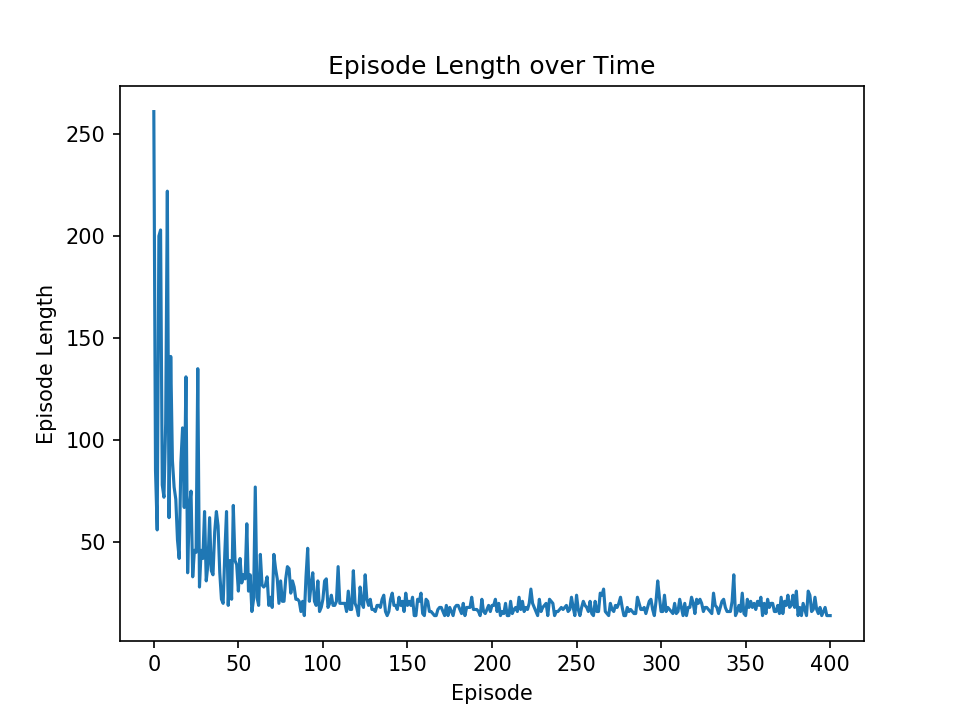

<IPython.core.display.Javascript object>


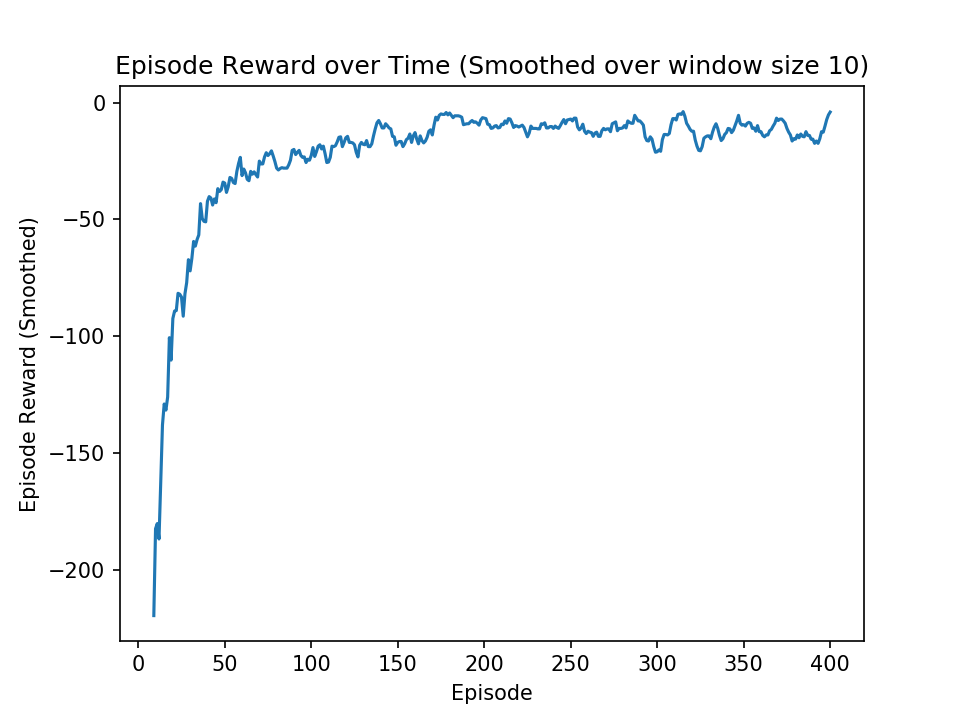

In [20]:
plotter_results(rewards, steps)